___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [3]:
clean_df = pd.read_csv('loan_data.csv')


** Check out the info(), head(), and describe() methods on loans.**

In [4]:
clean_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
clean_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
clean_df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

<Figure size 1080x288 with 0 Axes>

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


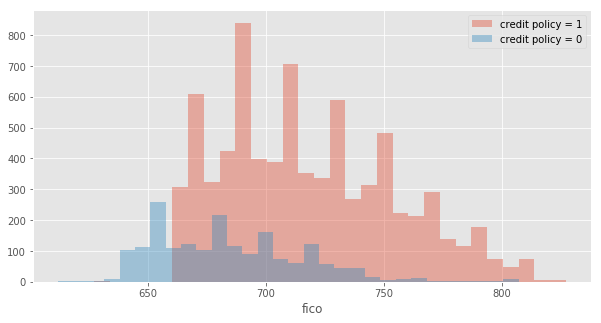

In [137]:
plt.style.use('ggplot')
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes(figsize=[15,4])
sns.distplot(kde=False, a=clean_df[clean_df['credit.policy']==1]['fico'], ax=ax, bins=30, label='credit policy = 1')
sns.distplot(kde=False, a=clean_df[clean_df['credit.policy']==0]['fico'], ax=ax, bins=30, label='credit policy = 0')
plt.legend()


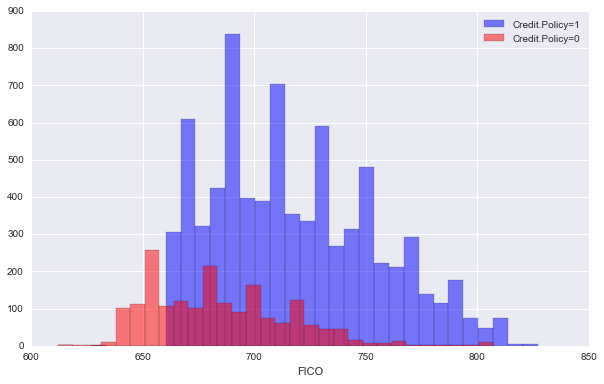

** Create a similar figure, except this time select by the not.fully.paid column.**

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Huy')

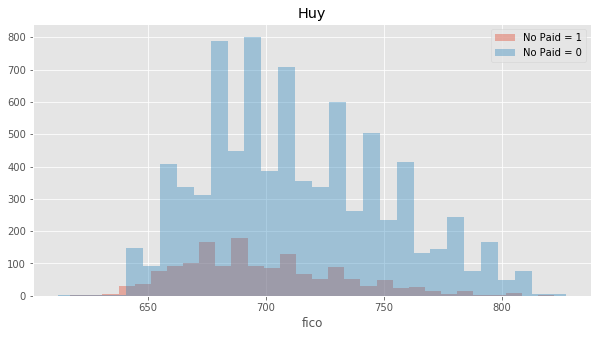

In [185]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_axes(figsize=[15,4])
sns.distplot(kde=False, a=clean_df[clean_df['not.fully.paid']==1]['fico'], ax=ax, bins=30, label='No Paid = 1')
sns.distplot(kde=False, a=clean_df[clean_df['not.fully.paid']==0]['fico'], ax=ax, bins=30, label='No Paid = 0')
plt.legend()
plt.title('Huy')

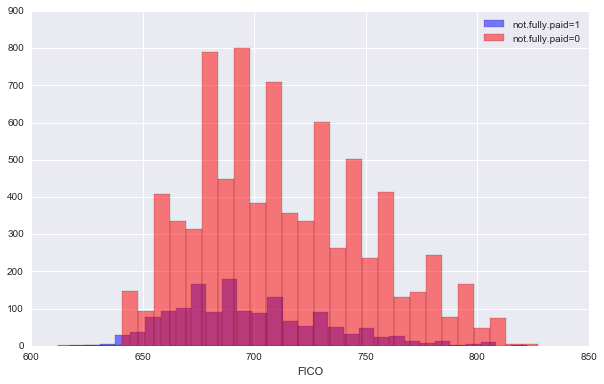

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

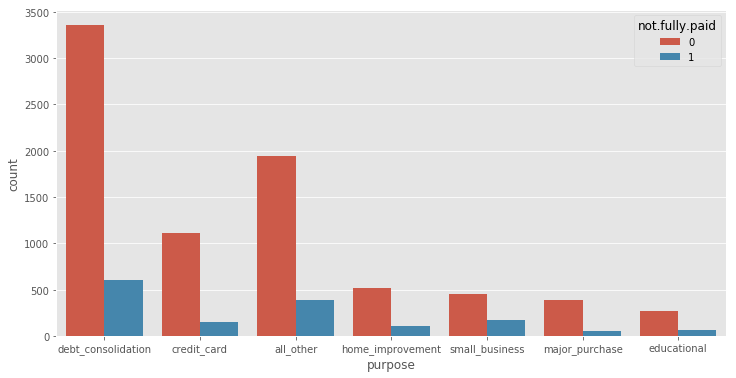

In [52]:
plt.figure(figsize=[12,6])
sns.countplot(x='purpose', data=clean_df, hue='not.fully.paid')

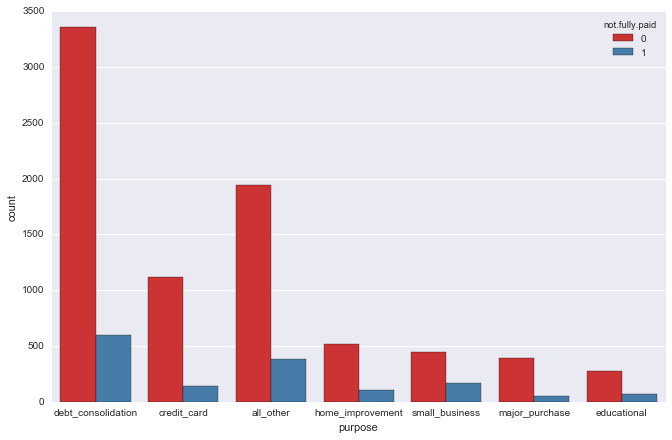

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


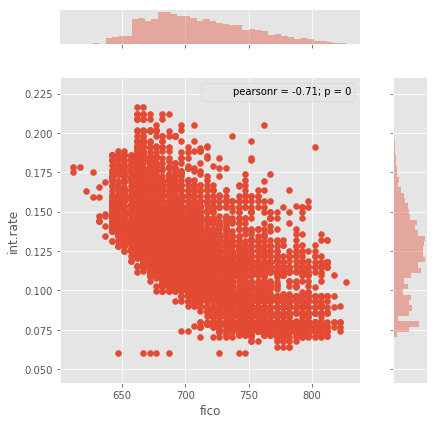

In [58]:
sns.jointplot(y='int.rate', x='fico', data=clean_df, size=6, space=1)

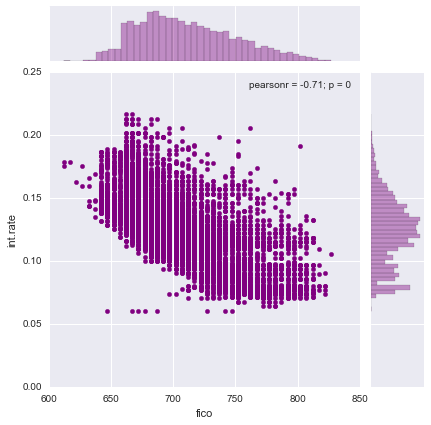

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

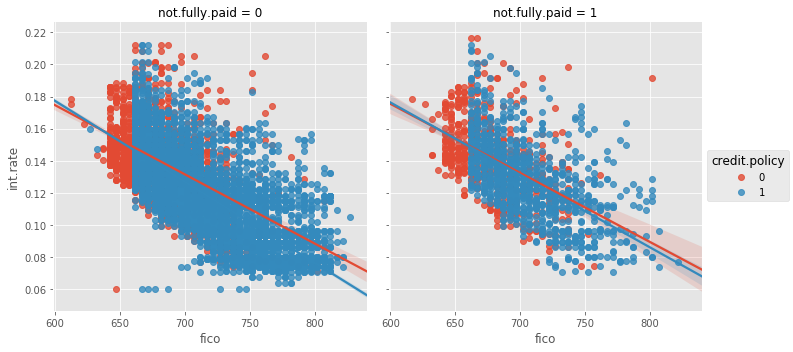

In [71]:
sns.lmplot(x='fico', y='int.rate',col='not.fully.paid', data=clean_df, hue='credit.policy')

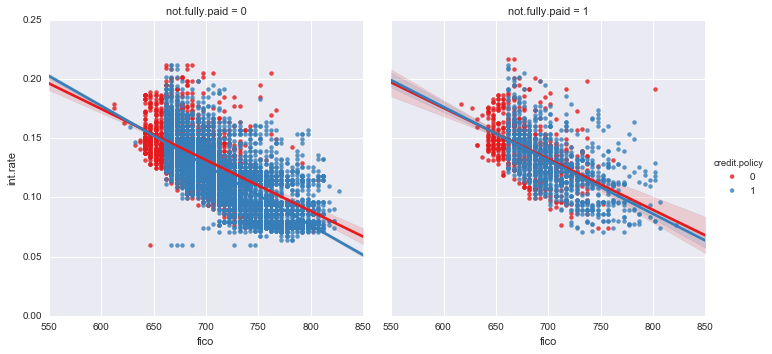

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [72]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [80]:
clean_df = pd.get_dummies(clean_df, columns=['purpose'],drop_first=True)
clean_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [85]:
scaler.fit_transform(clean_df.iloc[:,1:9])

array([[-0.13931753,  2.46309947,  0.68038804, ...,  0.4322297 ,
         0.35373245,  0.18270369],
       [-0.57886837, -0.43885443,  0.2440308 , ..., -0.72123005,
         0.49501762,  1.03060231],
       [ 0.48648368,  0.23070836, -0.90865897, ...,  0.05976963,
        -0.39707277, -0.73068304],
       ...,
       [-0.57886837, -1.06867038, -0.54569448, ..., -0.44485963,
        -0.20376479,  1.24430034],
       [ 1.39166043,  0.1569135 , -0.18272998, ..., -1.10572219,
        -0.50108875, -1.50275334],
       [ 0.61685894,  2.58060136,  0.54059439, ...,  0.07178501,
         0.62110478,  0.35159406]])

In [88]:
new_data.iloc[:,1:9] = scaler.fit_transform(clean_df.iloc[:,1:9])
new_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,0,0,0,0,0,1,0,0,0,0
1,1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,0,0,0,0,1,0,0,0,0,0
2,1,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,1,0,0,0,0,1,0,0,0,0
3,1,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,1,0,0,0,0,1,0,0,0,0
4,1,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,0,1,0,0,1,0,0,0,0,0


**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [90]:
from sklearn.model_selection import train_test_split
X1 = new_data[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business']]
y1 = new_data['not.fully.paid']
X2 = clean_df[['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business']]
y2 = clean_df['not.fully.paid']

In [91]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=101)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [92]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [175]:
dtree1 = DecisionTreeClassifier(criterion='entropy')
dtree2 = DecisionTreeClassifier(criterion='entropy')

In [176]:
dtree1.fit(X1_train, y1_train)
dtree2.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [177]:
predictions1 = dtree1.predict(X1_test)

In [178]:
predictions2 = dtree1.predict(X2_test)

In [179]:
from sklearn.metrics import classification_report, confusion_matrix

In [180]:
print(classification_report(y1_test, predictions1))
print()
print(classification_report(y2_test, predictions2))

             precision    recall  f1-score   support

          0       0.85      0.84      0.84      2431
          1       0.18      0.21      0.19       443

avg / total       0.75      0.74      0.74      2874


             precision    recall  f1-score   support

          0       0.88      0.78      0.83      2431
          1       0.25      0.40      0.31       443

avg / total       0.78      0.72      0.75      2874



             precision    recall  f1-score   support

          0       0.85      0.81      0.83      2431
          1       0.16      0.20      0.18       443

avg / total       0.74      0.72      0.73      2874



In [102]:
print(confusion_matrix(y1_test, predictions1))
print()
print(confusion_matrix(y2_test, predictions2))

[[1988  443]
 [ 335  108]]

[[1890  541]
 [ 264  179]]


[[1980  451]
 [ 355   88]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [171]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=50, criterion='entropy')
rf2 = RandomForestClassifier(n_estimators=50, criterion='entropy')

In [172]:
rf1.fit(X1_train, y1_train)
predictions1 = rf1.predict(X1_test)
rf2.fit(X2_train, y2_train)
predictions2 = rf2.predict(X2_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [173]:
print(classification_report(y1_test, predictions1))
print()
print(classification_report(y2_test, predictions2))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.52      0.02      0.05       443

avg / total       0.80      0.85      0.78      2874


             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.52      0.03      0.05       443

avg / total       0.80      0.85      0.78      2874



             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.56      0.01      0.02       443

avg / total       0.80      0.85      0.78      2874



In [174]:
print(confusion_matrix(y1_test, predictions1))
print()
print(confusion_matrix(y2_test, predictions2))

[[2421   10]
 [ 432   11]]

[[2420   11]
 [ 431   12]]


**Show the Confusion Matrix for the predictions.**

[[2427    4]
 [ 438    5]]


**What performed better the random forest or the decision tree?**

In [118]:
from sklearn.model_selection import GridSearchCV

In [126]:
param_grid = {'n_estimators': np.arange(1,201)}
param_grid

{'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 17

In [128]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=3)

In [129]:
grid.fit(X1_train, y1_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] n_estimators=1 ..................................................
[CV] ......... n_estimators=1, score=0.7397137745974955, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ......... n_estimators=1, score=0.7493285586392122, total=   0.0s
[CV] n_estimators=1 ..................................................
[CV] ......... n_estimators=1, score=0.7211280214861235, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ......... n_estimators=2, score=0.8135062611806798, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ......... n_estimators=2, score=0.8164726947179947, total=   0.0s
[CV] n_estimators=2 ..................................................
[CV] ......... n_estimators=2, score=0.8227394807520143, total=   0.0s
[CV] n_estimators=3 ..................................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ......... n_estimators=3, score=0.7820053715308863, total=   0.0s
[CV] n_estimators=3 ..................................................
[CV] ......... n_estimators=3, score=0.7730528200537153, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ......... n_estimators=4, score=0.8144007155635062, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ......... n_estimators=4, score=0.8209489704565801, total=   0.0s
[CV] n_estimators=4 ..................................................
[CV] ......... n_estimators=4, score=0.8209489704565801, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ......... n_estimators=5, score=0.8032200357781754, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ......... n_estimators=5, score=0.8124440465532676, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] .

[CV] ........ n_estimators=22, score=0.8272157564905999, total=   0.1s
[CV] n_estimators=23 .................................................
[CV] ........ n_estimators=23, score=0.8313953488372093, total=   0.1s
[CV] n_estimators=23 .................................................
[CV] ........ n_estimators=23, score=0.8343777976723367, total=   0.1s
[CV] n_estimators=23 .................................................
[CV] ........ n_estimators=23, score=0.8276633840644584, total=   0.1s
[CV] n_estimators=24 .................................................
[CV] ........ n_estimators=24, score=0.8313953488372093, total=   0.1s
[CV] n_estimators=24 .................................................
[CV] ........ n_estimators=24, score=0.8366159355416294, total=   0.1s
[CV] n_estimators=24 .................................................
[CV] ........ n_estimators=24, score=0.8285586392121754, total=   0.1s
[CV] n_estimators=25 .................................................
[CV] .

[CV] ........ n_estimators=42, score=0.8336314847942755, total=   0.3s
[CV] n_estimators=42 .................................................
[CV] ........ n_estimators=42, score=0.8361683079677709, total=   0.3s
[CV] n_estimators=42 .................................................
[CV] ........ n_estimators=42, score=0.8276633840644584, total=   0.3s
[CV] n_estimators=43 .................................................
[CV] ........ n_estimators=43, score=0.8331842576028623, total=   0.3s
[CV] n_estimators=43 .................................................
[CV] ........ n_estimators=43, score=0.8370635631154879, total=   0.3s
[CV] n_estimators=43 .................................................
[CV] ........ n_estimators=43, score=0.8352730528200537, total=   0.3s
[CV] n_estimators=44 .................................................
[CV] ........ n_estimators=44, score=0.8349731663685152, total=   0.3s
[CV] n_estimators=44 .................................................
[CV] .

[CV] ........ n_estimators=61, score=0.8366159355416294, total=   0.5s
[CV] n_estimators=61 .................................................
[CV] ........ n_estimators=61, score=0.8325872873769025, total=   0.4s
[CV] n_estimators=62 .................................................
[CV] ........ n_estimators=62, score=0.8345259391771019, total=   0.4s
[CV] n_estimators=62 .................................................
[CV] ........ n_estimators=62, score=0.8379588182632051, total=   0.5s
[CV] n_estimators=62 .................................................
[CV] ........ n_estimators=62, score=0.8321396598030438, total=   0.4s
[CV] n_estimators=63 .................................................
[CV] ........ n_estimators=63, score=0.8322898032200358, total=   0.4s
[CV] n_estimators=63 .................................................
[CV] ........ n_estimators=63, score=0.8384064458370636, total=   0.4s
[CV] n_estimators=63 .................................................
[CV] .

[CV] ........ n_estimators=80, score=0.8343777976723367, total=   0.6s
[CV] n_estimators=81 .................................................
[CV] ........ n_estimators=81, score=0.8376565295169947, total=   0.6s
[CV] n_estimators=81 .................................................
[CV] ........ n_estimators=81, score=0.8401969561324978, total=   0.6s
[CV] n_estimators=81 .................................................
[CV] ........ n_estimators=81, score=0.8343777976723367, total=   0.6s
[CV] n_estimators=82 .................................................
[CV] ........ n_estimators=82, score=0.8354203935599285, total=   0.6s
[CV] n_estimators=82 .................................................
[CV] ........ n_estimators=82, score=0.8393017009847806, total=   0.6s
[CV] n_estimators=82 .................................................
[CV] ........ n_estimators=82, score=0.8334825425246195, total=   0.6s
[CV] n_estimators=83 .................................................
[CV] .

[CV] ....... n_estimators=100, score=0.8385509838998211, total=   0.7s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.8384064458370636, total=   0.7s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.8312444046553268, total=   0.7s
[CV] n_estimators=101 ................................................
[CV] ....... n_estimators=101, score=0.8349731663685152, total=   0.7s
[CV] n_estimators=101 ................................................
[CV] ....... n_estimators=101, score=0.8401969561324978, total=   0.7s
[CV] n_estimators=101 ................................................
[CV] ....... n_estimators=101, score=0.8325872873769025, total=   0.7s
[CV] n_estimators=102 ................................................
[CV] ....... n_estimators=102, score=0.8367620751341681, total=   0.7s
[CV] n_estimators=102 ................................................
[CV] .

[CV] ....... n_estimators=119, score=0.8393017009847806, total=   0.9s
[CV] n_estimators=119 ................................................
[CV] ....... n_estimators=119, score=0.8303491495076096, total=   0.9s
[CV] n_estimators=120 ................................................
[CV] ....... n_estimators=120, score=0.8367620751341681, total=   0.9s
[CV] n_estimators=120 ................................................
[CV] ....... n_estimators=120, score=0.8375111906893464, total=   0.9s
[CV] n_estimators=120 ................................................
[CV] ....... n_estimators=120, score=0.8312444046553268, total=   0.9s
[CV] n_estimators=121 ................................................
[CV] ....... n_estimators=121, score=0.8340787119856887, total=   0.9s
[CV] n_estimators=121 ................................................
[CV] ....... n_estimators=121, score=0.8393017009847806, total=   0.9s
[CV] n_estimators=121 ................................................
[CV] .

[CV] ....... n_estimators=138, score=0.8321396598030438, total=   1.0s
[CV] n_estimators=139 ................................................
[CV] ....... n_estimators=139, score=0.8367620751341681, total=   1.0s
[CV] n_estimators=139 ................................................
[CV] ....... n_estimators=139, score=0.8401969561324978, total=   1.0s
[CV] n_estimators=139 ................................................
[CV] ....... n_estimators=139, score=0.8316920322291853, total=   1.0s
[CV] n_estimators=140 ................................................
[CV] ....... n_estimators=140, score=0.8363148479427549, total=   1.0s
[CV] n_estimators=140 ................................................
[CV] ....... n_estimators=140, score=0.8393017009847806, total=   1.1s
[CV] n_estimators=140 ................................................
[CV] ....... n_estimators=140, score=0.8312444046553268, total=   1.1s
[CV] n_estimators=141 ................................................
[CV] .

[CV] ....... n_estimators=158, score=0.8345259391771019, total=   1.2s
[CV] n_estimators=158 ................................................
[CV] ....... n_estimators=158, score=0.8388540734109221, total=   1.3s
[CV] n_estimators=158 ................................................
[CV] ........ n_estimators=158, score=0.833034914950761, total=   1.3s
[CV] n_estimators=159 ................................................
[CV] ....... n_estimators=159, score=0.8336314847942755, total=   1.3s
[CV] n_estimators=159 ................................................
[CV] ....... n_estimators=159, score=0.8375111906893464, total=   1.2s
[CV] n_estimators=159 ................................................
[CV] ....... n_estimators=159, score=0.8316920322291853, total=   1.2s
[CV] n_estimators=160 ................................................
[CV] ....... n_estimators=160, score=0.8349731663685152, total=   1.2s
[CV] n_estimators=160 ................................................
[CV] .

[CV] ....... n_estimators=177, score=0.8388540734109221, total=   1.5s
[CV] n_estimators=177 ................................................
[CV] ....... n_estimators=177, score=0.8312444046553268, total=   1.4s
[CV] n_estimators=178 ................................................
[CV] ....... n_estimators=178, score=0.8376565295169947, total=   1.5s
[CV] n_estimators=178 ................................................
[CV] ....... n_estimators=178, score=0.8384064458370636, total=   1.4s
[CV] n_estimators=178 ................................................
[CV] ....... n_estimators=178, score=0.8307967770814683, total=   1.4s
[CV] n_estimators=179 ................................................
[CV] ....... n_estimators=179, score=0.8345259391771019, total=   1.4s
[CV] n_estimators=179 ................................................
[CV] ....... n_estimators=179, score=0.8384064458370636, total=   1.4s
[CV] n_estimators=179 ................................................
[CV] .

[CV] ....... n_estimators=196, score=0.8325872873769025, total=   1.6s
[CV] n_estimators=197 ................................................
[CV] ....... n_estimators=197, score=0.8363148479427549, total=   1.6s
[CV] n_estimators=197 ................................................
[CV] ....... n_estimators=197, score=0.8379588182632051, total=   1.6s
[CV] n_estimators=197 ................................................
[CV] ....... n_estimators=197, score=0.8321396598030438, total=   1.6s
[CV] n_estimators=198 ................................................
[CV] ....... n_estimators=198, score=0.8354203935599285, total=   1.7s
[CV] n_estimators=198 ................................................
[CV] ....... n_estimators=198, score=0.8375111906893464, total=   1.7s
[CV] n_estimators=198 ................................................
[CV] ....... n_estimators=198, score=0.8299015219337511, total=   2.2s
[CV] n_estimators=199 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  9.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([  1,   2, ..., 199, 200])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [144]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=74, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
grid.cv_results_['mean_test_score']

array([0.73672434, 0.8175716 , 0.78147375, 0.81876492, 0.80593675,
       0.82189737, 0.81772076, 0.82562649, 0.8226432 , 0.82816229,
       0.82652148, 0.82801313, 0.82935561, 0.83129475, 0.82846062,
       0.82950477, 0.82756563, 0.83054893, 0.82950477, 0.83129475,
       0.83308473, 0.83129475, 0.83114558, 0.83218974, 0.83144391,
       0.83397971, 0.83099642, 0.8323389 , 0.83412888, 0.8323389 ,
       0.83427804, 0.83308473, 0.8327864 , 0.83427804, 0.83442721,
       0.83427804, 0.83412888, 0.83338305, 0.83397971, 0.83636635,
       0.83427804, 0.83248807, 0.83517303, 0.83397971, 0.83039976,
       0.83621718, 0.83576969, 0.83368138, 0.83338305, 0.83427804,
       0.83397971, 0.83353222, 0.83472554, 0.83547136, 0.83726134,
       0.83457637, 0.8348747 , 0.83383055, 0.83412888, 0.83427804,
       0.83472554, 0.8348747 , 0.83383055, 0.83457637, 0.83412888,
       0.83711217, 0.83368138, 0.83427804, 0.83457637, 0.83576969,
       0.83263723, 0.83412888, 0.83472554, 0.8374105 , 0.83547

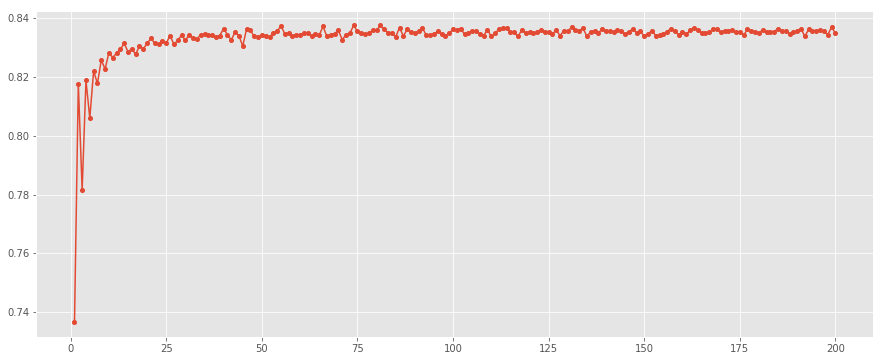

In [170]:
plt.figure(figsize=[15,6])
plt.plot(np.arange(1,201), grid.cv_results_['mean_test_score'], marker='o', markersize=4)

In [132]:
best_pred=grid.predict(X1_test)

In [133]:
print(classification_report(y1_test, best_pred))
print()
print(confusion_matrix(y1_test, best_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.60      0.03      0.05       443

avg / total       0.81      0.85      0.78      2874


[[2423    8]
 [ 431   12]]


# Great Job!